In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

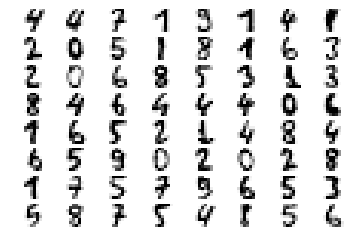

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.51374 stdev: 0.16774
Best fitness: 0.97538 - size: (2, 13) - species 4 - id 39
Average adjusted fitness: 0.487
Mean genetic distance 2.931, standard deviation 0.464
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 1.776 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59989 stdev: 0.17635
Best fitness: 0.98462 - size: (3, 14) - species 23 - id 332
Average adjusted fitness: 0.558
Mean genetic distance 3.034, standard deviation 0.442
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 1.888 sec (1.832 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63397 stdev: 0.17688
Best fitness: 0.98462 - size: (3, 14) - species 23 - id 332
Average adjusted fitness: 0.600
Mean genetic distance 3.028, standard deviation 0.451
Population of 203 members in 36 species
Total extincti

Mean genetic distance 3.249, standard deviation 0.499
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 2.801 sec (2.500 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.74976 stdev: 0.21402
Best fitness: 1.00000 - size: (3, 15) - species 33 - id 1885

Best individual in generation 12 meets fitness threshold - complexity: (3, 15)
Class1:0 #class1:162
Class2:3 #class2:165

 ****** Running generation 0 ****** 

Population's average fitness: 0.48375 stdev: 0.16456
Best fitness: 0.94190 - size: (2, 13) - species 4 - id 29
Average adjusted fitness: 0.487
Mean genetic distance 2.895, standard deviation 0.479
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 1.805 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57199 stdev: 0.17668
Best fitness: 0.98471 - size: (3, 15) - species 8 - id 216
Average adjusted fitness: 0.531
Mean genetic distance 2.965, standard deviation 0.469
Popul

Population's average fitness: 0.78734 stdev: 0.19464
Best fitness: 0.99694 - size: (4, 19) - species 25 - id 3119
Average adjusted fitness: 0.520
Mean genetic distance 3.124, standard deviation 0.511
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 2.615 sec (2.760 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.78722 stdev: 0.21468
Best fitness: 0.99694 - size: (3, 17) - species 25 - id 2353
Average adjusted fitness: 0.724
Mean genetic distance 3.124, standard deviation 0.525
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 2.546 sec (2.772 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.80360 stdev: 0.19694
Best fitness: 0.99694 - size: (3, 17) - species 25 - id 2353
Average adjusted fitness: 0.649
Mean genetic distance 3.138, standard deviation 0.519
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 2.490 sec (2.755 average)

 ******

Mean genetic distance 3.225, standard deviation 0.484
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 2.266 sec (2.432 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.76677 stdev: 0.20458
Best fitness: 0.99690 - size: (6, 23) - species 32 - id 2371
Average adjusted fitness: 0.652
Mean genetic distance 3.201, standard deviation 0.492
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 2.572 sec (2.454 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.76098 stdev: 0.19693
Best fitness: 0.99690 - size: (6, 23) - species 32 - id 2371
Average adjusted fitness: 0.549
Mean genetic distance 3.219, standard deviation 0.495
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 2.513 sec (2.483 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.76285 stdev: 0.19388
Best fitness: 1.00000 - size: (6, 24) - species 32 - id 2637


Population's average fitness: 0.76844 stdev: 0.19661
Best fitness: 0.98773 - size: (5, 20) - species 44 - id 2324
Average adjusted fitness: 0.692
Mean genetic distance 3.180, standard deviation 0.511
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 2.439 sec (2.481 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.77510 stdev: 0.18769
Best fitness: 0.98773 - size: (5, 20) - species 44 - id 2324
Average adjusted fitness: 0.645
Mean genetic distance 3.183, standard deviation 0.506
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 2.545 sec (2.489 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.76040 stdev: 0.18930
Best fitness: 0.98773 - size: (5, 20) - species 44 - id 2324
Average adjusted fitness: 0.580
Mean genetic distance 3.194, standard deviation 0.519
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 2.515 sec (2.492 average)

 ******

Mean genetic distance 3.078, standard deviation 0.511
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 2.799 sec (2.385 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.75650 stdev: 0.20006
Best fitness: 0.99692 - size: (2, 12) - species 15 - id 1118
Average adjusted fitness: 0.491
Mean genetic distance 3.084, standard deviation 0.507
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 2.300 sec (2.375 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.75961 stdev: 0.20033
Best fitness: 0.99692 - size: (2, 12) - species 15 - id 1118
Average adjusted fitness: 0.464
Mean genetic distance 3.088, standard deviation 0.508
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 2.340 sec (2.371 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75637 stdev: 0.19650
Best fitness: 0.99692 - size: (2, 12) - species 15 - id 1118
Ave

Mean genetic distance 3.029, standard deviation 0.476
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.514 sec (3.656 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66645 stdev: 0.17518
Best fitness: 0.99383 - size: (3, 17) - species 9 - id 697
Average adjusted fitness: 0.486
Mean genetic distance 3.022, standard deviation 0.478
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 4.246 sec (3.754 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66846 stdev: 0.17574
Best fitness: 0.99383 - size: (3, 17) - species 9 - id 697
Average adjusted fitness: 0.615
Mean genetic distance 3.082, standard deviation 0.479
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 2.984 sec (3.644 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68676 stdev: 0.16233
Best fitness: 0.99383 - size: (3, 17) - species 9 - id 697
Average a

Population's average fitness: 0.65065 stdev: 0.14930
Best fitness: 0.95666 - size: (5, 20) - species 28 - id 1107
Average adjusted fitness: 0.395
Mean genetic distance 3.203, standard deviation 0.474
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 5.139 sec (5.086 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66587 stdev: 0.14911
Best fitness: 0.95666 - size: (5, 20) - species 28 - id 1107
Average adjusted fitness: 0.417
Mean genetic distance 3.198, standard deviation 0.471
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.337 sec (5.225 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67170 stdev: 0.14554
Best fitness: 0.95666 - size: (5, 20) - species 28 - id 1107
Average adjusted fitness: 0.404
Mean genetic distance 3.211, standard deviation 0.463
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 5.989 sec (5.302 average)

 ****** R

Population's average fitness: 0.72013 stdev: 0.16916
Best fitness: 0.96594 - size: (7, 27) - species 5 - id 3496
Average adjusted fitness: 0.515
Mean genetic distance 3.304, standard deviation 0.536
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.608 sec (4.495 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.73328 stdev: 0.16170
Best fitness: 0.96904 - size: (8, 29) - species 5 - id 4389
Average adjusted fitness: 0.406
Mean genetic distance 3.298, standard deviation 0.536
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 4.823 sec (4.489 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.74053 stdev: 0.16449
Best fitness: 0.96904 - size: (8, 29) - species 5 - id 4389
Average adjusted fitness: 0.476
Mean genetic distance 3.297, standard deviation 0.521
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 4.546 sec (4.508 average)

 ****** Ru

Population's average fitness: 0.72176 stdev: 0.16596
Best fitness: 0.97523 - size: (7, 23) - species 13 - id 7987
Average adjusted fitness: 0.387
Mean genetic distance 3.248, standard deviation 0.577
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 5.115 sec (5.039 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.72081 stdev: 0.17278
Best fitness: 0.97523 - size: (7, 23) - species 13 - id 7987
Average adjusted fitness: 0.539
Mean genetic distance 3.249, standard deviation 0.587
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 4.768 sec (5.005 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.71672 stdev: 0.16374
Best fitness: 0.97523 - size: (7, 23) - species 13 - id 7987
Average adjusted fitness: 0.393
Mean genetic distance 3.240, standard deviation 0.575
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 5.058 sec (5.001 average)

 ******

Population's average fitness: 0.72553 stdev: 0.17994
Best fitness: 0.98780 - size: (5, 18) - species 3 - id 1798
Average adjusted fitness: 0.554
Mean genetic distance 3.160, standard deviation 0.503
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 4.003 sec (3.883 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73063 stdev: 0.15982
Best fitness: 0.98780 - size: (5, 18) - species 3 - id 1798
Average adjusted fitness: 0.387
Mean genetic distance 3.154, standard deviation 0.495
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 3.978 sec (3.914 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73352 stdev: 0.16255
Best fitness: 0.98780 - size: (5, 18) - species 3 - id 1798
Average adjusted fitness: 0.424
Mean genetic distance 3.177, standard deviation 0.491
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 4.026 sec (3.962 average)

 ****** Ru

Population's average fitness: 0.76254 stdev: 0.18525
Best fitness: 0.99390 - size: (4, 19) - species 42 - id 4733
Average adjusted fitness: 0.544
Mean genetic distance 3.266, standard deviation 0.534
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 4.301 sec (4.454 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.76521 stdev: 0.18899
Best fitness: 0.99390 - size: (4, 19) - species 42 - id 4733
Average adjusted fitness: 0.603
Mean genetic distance 3.273, standard deviation 0.510
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.769 sec (4.480 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.77787 stdev: 0.16287
Best fitness: 0.99390 - size: (4, 19) - species 42 - id 4733
Average adjusted fitness: 0.333
Mean genetic distance 3.224, standard deviation 0.519
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.432 sec (4.484 average)

 ******

Population's average fitness: 0.80210 stdev: 0.18313
Best fitness: 0.99695 - size: (4, 20) - species 42 - id 8799
Average adjusted fitness: 0.612
Mean genetic distance 3.206, standard deviation 0.579
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 4.742 sec (4.944 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.78090 stdev: 0.18299
Best fitness: 0.99695 - size: (4, 20) - species 42 - id 8799
Average adjusted fitness: 0.371
Mean genetic distance 3.189, standard deviation 0.586
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 5.101 sec (4.961 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.78815 stdev: 0.17858
Best fitness: 0.99695 - size: (6, 23) - species 42 - id 9273
Average adjusted fitness: 0.368
Mean genetic distance 3.220, standard deviation 0.572
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 5.689 sec (5.055 average)

 ******

Population's average fitness: 0.72717 stdev: 0.15269
Best fitness: 0.96296 - size: (4, 17) - species 12 - id 1355
Average adjusted fitness: 0.536
Mean genetic distance 3.234, standard deviation 0.462
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 4.235 sec (4.111 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71784 stdev: 0.15718
Best fitness: 0.96296 - size: (4, 17) - species 12 - id 1355
Average adjusted fitness: 0.499
Mean genetic distance 3.207, standard deviation 0.473
Population of 189 members in 40 species
Total extinctions: 0
Generation time: 3.907 sec (4.101 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.71674 stdev: 0.15683
Best fitness: 0.96296 - size: (4, 17) - species 12 - id 1355
Average adjusted fitness: 0.365
Mean genetic distance 3.239, standard deviation 0.480
Population of 191 members in 40 species
Total extinctions: 0
Generation time: 3.986 sec (4.099 average)

 ******

Population's average fitness: 0.74266 stdev: 0.15553
Best fitness: 0.97222 - size: (4, 17) - species 37 - id 5028
Average adjusted fitness: 0.318
Mean genetic distance 3.279, standard deviation 0.521
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 4.180 sec (4.168 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.71368 stdev: 0.16572
Best fitness: 0.97222 - size: (4, 17) - species 37 - id 5028
Average adjusted fitness: 0.511
Mean genetic distance 3.276, standard deviation 0.528
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.294 sec (4.193 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.72259 stdev: 0.16212
Best fitness: 0.97531 - size: (6, 16) - species 14 - id 5950
Average adjusted fitness: 0.490
Mean genetic distance 3.291, standard deviation 0.536
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 4.207 sec (4.217 average)

 ******

Population's average fitness: 0.72816 stdev: 0.15789
Best fitness: 0.98148 - size: (9, 26) - species 54 - id 8155
Average adjusted fitness: 0.461
Mean genetic distance 3.202, standard deviation 0.563
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 4.985 sec (4.659 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.71881 stdev: 0.17630
Best fitness: 0.98148 - size: (9, 26) - species 54 - id 8155
Average adjusted fitness: 0.535
Mean genetic distance 3.210, standard deviation 0.565
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 4.957 sec (4.721 average)
Class1:1 #class1:163
Class2:5 #class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.50483 stdev: 0.14267
Best fitness: 0.94801 - size: (2, 13) - species 3 - id 140
Average adjusted fitness: 0.398
Mean genetic distance 2.872, standard deviation 0.473
Population of 199 members in 25 species
Total extinctions: 0
Generation t

Population's average fitness: 0.74049 stdev: 0.16936
Best fitness: 0.96636 - size: (3, 17) - species 9 - id 2304
Average adjusted fitness: 0.528
Mean genetic distance 3.161, standard deviation 0.540
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 4.159 sec (3.912 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.72497 stdev: 0.17030
Best fitness: 0.96636 - size: (3, 17) - species 9 - id 2304
Average adjusted fitness: 0.462
Mean genetic distance 3.165, standard deviation 0.540
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 3.990 sec (3.917 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.74564 stdev: 0.17193
Best fitness: 0.97554 - size: (8, 22) - species 14 - id 3392
Average adjusted fitness: 0.532
Mean genetic distance 3.161, standard deviation 0.545
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 3.935 sec (3.922 average)

 ****** R

Population's average fitness: 0.73916 stdev: 0.17073
Best fitness: 0.97554 - size: (8, 22) - species 14 - id 3392
Average adjusted fitness: 0.494
Mean genetic distance 3.195, standard deviation 0.597
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.224 sec (4.252 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.72333 stdev: 0.16947
Best fitness: 0.97554 - size: (8, 22) - species 14 - id 3392
Average adjusted fitness: 0.542
Mean genetic distance 3.185, standard deviation 0.608
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 4.245 sec (4.267 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.74114 stdev: 0.16252
Best fitness: 0.97554 - size: (8, 22) - species 14 - id 3392
Average adjusted fitness: 0.374
Mean genetic distance 3.196, standard deviation 0.605
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 4.145 sec (4.272 average)

 ******

Population's average fitness: 0.63075 stdev: 0.15127
Best fitness: 0.96933 - size: (4, 16) - species 1 - id 688
Average adjusted fitness: 0.347
Mean genetic distance 3.074, standard deviation 0.482
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 3.475 sec (3.166 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62771 stdev: 0.16784
Best fitness: 0.97853 - size: (4, 15) - species 32 - id 815
Average adjusted fitness: 0.473
Mean genetic distance 3.089, standard deviation 0.479
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 3.524 sec (3.238 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64112 stdev: 0.18361
Best fitness: 0.97853 - size: (4, 15) - species 32 - id 815
Average adjusted fitness: 0.512
Mean genetic distance 3.111, standard deviation 0.488
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 3.609 sec (3.300 average)

 ****** Runni

Population's average fitness: 0.75663 stdev: 0.18906
Best fitness: 0.98773 - size: (4, 15) - species 37 - id 3209
Average adjusted fitness: 0.545
Mean genetic distance 3.194, standard deviation 0.511
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 4.225 sec (4.054 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74355 stdev: 0.18945
Best fitness: 0.98773 - size: (4, 15) - species 37 - id 3209
Average adjusted fitness: 0.466
Mean genetic distance 3.207, standard deviation 0.519
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 4.253 sec (4.079 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.74630 stdev: 0.18955
Best fitness: 0.98773 - size: (4, 15) - species 37 - id 3209
Average adjusted fitness: 0.533
Mean genetic distance 3.180, standard deviation 0.515
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 4.241 sec (4.112 average)

 ******

Population's average fitness: 0.75429 stdev: 0.19088
Best fitness: 0.99693 - size: (5, 18) - species 37 - id 4651
Average adjusted fitness: 0.604
Mean genetic distance 3.141, standard deviation 0.531
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.058 sec (4.776 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.78464 stdev: 0.18836
Best fitness: 0.99693 - size: (5, 18) - species 37 - id 4651
Average adjusted fitness: 0.684
Mean genetic distance 3.161, standard deviation 0.525
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.878 sec (4.812 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.76333 stdev: 0.18994
Best fitness: 0.99693 - size: (5, 18) - species 37 - id 4651
Average adjusted fitness: 0.575
Mean genetic distance 3.157, standard deviation 0.530
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.806 sec (4.839 average)

 ******

Population's average fitness: 0.65050 stdev: 0.14789
Best fitness: 0.96594 - size: (6, 20) - species 2 - id 1151
Average adjusted fitness: 0.423
Mean genetic distance 3.174, standard deviation 0.503
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 3.678 sec (3.550 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66865 stdev: 0.14077
Best fitness: 0.96594 - size: (5, 18) - species 2 - id 911
Average adjusted fitness: 0.447
Mean genetic distance 3.137, standard deviation 0.501
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 3.876 sec (3.582 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64837 stdev: 0.15243
Best fitness: 0.96594 - size: (5, 18) - species 2 - id 911
Average adjusted fitness: 0.433
Mean genetic distance 3.161, standard deviation 0.496
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 3.695 sec (3.638 average)

 ****** Runni

Population's average fitness: 0.73324 stdev: 0.17803
Best fitness: 0.99071 - size: (7, 20) - species 35 - id 4022
Average adjusted fitness: 0.487
Mean genetic distance 3.342, standard deviation 0.496
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.086 sec (4.159 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.72438 stdev: 0.17291
Best fitness: 0.99071 - size: (7, 20) - species 35 - id 4022
Average adjusted fitness: 0.410
Mean genetic distance 3.355, standard deviation 0.482
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 4.311 sec (4.185 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.73675 stdev: 0.17545
Best fitness: 0.99071 - size: (7, 20) - species 35 - id 4022
Average adjusted fitness: 0.472
Mean genetic distance 3.351, standard deviation 0.499
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 4.126 sec (4.193 average)

 ******

Population's average fitness: 0.75514 stdev: 0.17545
Best fitness: 0.99071 - size: (11, 28) - species 52 - id 7191
Average adjusted fitness: 0.361
Mean genetic distance 3.336, standard deviation 0.622
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.444 sec (4.445 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.75232 stdev: 0.17480
Best fitness: 0.99071 - size: (11, 28) - species 52 - id 7191
Average adjusted fitness: 0.348
Mean genetic distance 3.334, standard deviation 0.611
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 4.326 sec (4.425 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.77521 stdev: 0.17707
Best fitness: 0.99071 - size: (11, 28) - species 52 - id 7191
Average adjusted fitness: 0.392
Mean genetic distance 3.337, standard deviation 0.601
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 4.407 sec (4.423 average)

 ***

Population's average fitness: 0.65266 stdev: 0.13413
Best fitness: 0.89062 - size: (7, 23) - species 28 - id 2025
Average adjusted fitness: 0.430
Mean genetic distance 3.149, standard deviation 0.513
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 3.696 sec (3.577 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64816 stdev: 0.12988
Best fitness: 0.89375 - size: (4, 20) - species 23 - id 2284
Average adjusted fitness: 0.338
Mean genetic distance 3.147, standard deviation 0.492
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 3.715 sec (3.616 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65386 stdev: 0.12781
Best fitness: 0.89375 - size: (4, 20) - species 23 - id 2284
Average adjusted fitness: 0.264
Mean genetic distance 3.162, standard deviation 0.492
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 3.979 sec (3.686 average)

 ******

Population's average fitness: 0.65622 stdev: 0.13530
Best fitness: 0.89375 - size: (4, 20) - species 23 - id 2284
Average adjusted fitness: 0.335
Mean genetic distance 3.166, standard deviation 0.529
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.141 sec (3.939 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.67376 stdev: 0.13387
Best fitness: 0.89375 - size: (4, 20) - species 23 - id 2284
Average adjusted fitness: 0.449
Mean genetic distance 3.137, standard deviation 0.539
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.013 sec (3.949 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.67079 stdev: 0.12603
Best fitness: 0.89375 - size: (4, 20) - species 23 - id 2284
Average adjusted fitness: 0.360
Mean genetic distance 3.140, standard deviation 0.546
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 3.903 sec (3.948 average)

 ******

Population's average fitness: 0.66748 stdev: 0.13546
Best fitness: 0.89687 - size: (8, 23) - species 19 - id 9350
Average adjusted fitness: 0.334
Mean genetic distance 3.147, standard deviation 0.532
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 4.841 sec (4.520 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.68088 stdev: 0.13459
Best fitness: 0.89687 - size: (8, 23) - species 19 - id 9350
Average adjusted fitness: 0.282
Mean genetic distance 3.174, standard deviation 0.549
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 4.560 sec (4.565 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.66040 stdev: 0.13802
Best fitness: 0.91563 - size: (13, 38) - species 20 - id 9823
Average adjusted fitness: 0.354
Mean genetic distance 3.203, standard deviation 0.566
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 4.743 sec (4.608 average)

 *****

Population's average fitness: 0.72601 stdev: 0.14080
Best fitness: 0.94154 - size: (5, 20) - species 29 - id 2603
Average adjusted fitness: 0.350
Mean genetic distance 3.123, standard deviation 0.492
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 3.862 sec (3.770 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70939 stdev: 0.15294
Best fitness: 0.94154 - size: (5, 20) - species 29 - id 2603
Average adjusted fitness: 0.553
Mean genetic distance 3.115, standard deviation 0.497
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 3.677 sec (3.784 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70954 stdev: 0.14810
Best fitness: 0.94154 - size: (5, 20) - species 29 - id 2603
Average adjusted fitness: 0.393
Mean genetic distance 3.114, standard deviation 0.491
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 3.782 sec (3.799 average)

 ******

Population's average fitness: 0.73951 stdev: 0.14930
Best fitness: 0.96615 - size: (5, 21) - species 40 - id 4301
Average adjusted fitness: 0.289
Mean genetic distance 3.251, standard deviation 0.564
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 4.367 sec (4.348 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.74910 stdev: 0.15568
Best fitness: 0.96615 - size: (5, 21) - species 40 - id 4301
Average adjusted fitness: 0.544
Mean genetic distance 3.247, standard deviation 0.565
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 4.410 sec (4.377 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.72325 stdev: 0.16581
Best fitness: 0.96615 - size: (5, 21) - species 40 - id 4301
Average adjusted fitness: 0.495
Mean genetic distance 3.254, standard deviation 0.564
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.463 sec (4.392 average)

 ******

Population's average fitness: 0.75242 stdev: 0.17178
Best fitness: 0.96615 - size: (5, 21) - species 40 - id 4301
Average adjusted fitness: 0.535
Mean genetic distance 3.117, standard deviation 0.547
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 4.869 sec (4.821 average)
Class1:2 #class1:160
Class2:3 #class2:165

 ****** Running generation 0 ****** 

Population's average fitness: 0.51818 stdev: 0.10126
Best fitness: 0.88615 - size: (2, 13) - species 1 - id 176
Average adjusted fitness: 0.313
Mean genetic distance 2.938, standard deviation 0.456
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 2.880 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56122 stdev: 0.13619
Best fitness: 0.91077 - size: (3, 15) - species 29 - id 369
Average adjusted fitness: 0.413
Mean genetic distance 2.998, standard deviation 0.486
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 3.081 sec (2.

Population's average fitness: 0.74521 stdev: 0.15680
Best fitness: 0.96923 - size: (4, 19) - species 4 - id 1027
Average adjusted fitness: 0.359
Mean genetic distance 3.245, standard deviation 0.523
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 3.983 sec (3.829 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.71757 stdev: 0.18121
Best fitness: 0.96923 - size: (6, 23) - species 43 - id 3274
Average adjusted fitness: 0.452
Mean genetic distance 3.221, standard deviation 0.534
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 3.987 sec (3.840 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73655 stdev: 0.16429
Best fitness: 0.96923 - size: (6, 23) - species 43 - id 3274
Average adjusted fitness: 0.468
Mean genetic distance 3.220, standard deviation 0.549
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.148 sec (3.884 average)

 ****** 

Population's average fitness: 0.72538 stdev: 0.17276
Best fitness: 0.98462 - size: (10, 28) - species 47 - id 6509
Average adjusted fitness: 0.632
Mean genetic distance 3.370, standard deviation 0.590
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 5.017 sec (4.681 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.75369 stdev: 0.16549
Best fitness: 0.98462 - size: (9, 27) - species 47 - id 5838
Average adjusted fitness: 0.307
Mean genetic distance 3.353, standard deviation 0.616
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 4.645 sec (4.701 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.72437 stdev: 0.18397
Best fitness: 0.98462 - size: (10, 28) - species 47 - id 6509
Average adjusted fitness: 0.471
Mean genetic distance 3.345, standard deviation 0.617
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 4.627 sec (4.691 average)

 ****

Population's average fitness: 0.67788 stdev: 0.17450
Best fitness: 0.97819 - size: (4, 16) - species 4 - id 689
Average adjusted fitness: 0.580
Mean genetic distance 3.142, standard deviation 0.477
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 3.533 sec (3.208 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67949 stdev: 0.18008
Best fitness: 0.97819 - size: (4, 16) - species 4 - id 689
Average adjusted fitness: 0.477
Mean genetic distance 3.162, standard deviation 0.472
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 3.413 sec (3.242 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71515 stdev: 0.18003
Best fitness: 0.98754 - size: (3, 14) - species 35 - id 1036
Average adjusted fitness: 0.573
Mean genetic distance 3.158, standard deviation 0.472
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 3.566 sec (3.288 average)

 ****** Runni

Population's average fitness: 0.79264 stdev: 0.19376
Best fitness: 0.99377 - size: (5, 21) - species 53 - id 2937
Average adjusted fitness: 0.683
Mean genetic distance 3.273, standard deviation 0.490
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 4.470 sec (4.131 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.78415 stdev: 0.18874
Best fitness: 0.99377 - size: (5, 21) - species 53 - id 2937
Average adjusted fitness: 0.564
Mean genetic distance 3.282, standard deviation 0.495
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 4.376 sec (4.183 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.77942 stdev: 0.18451
Best fitness: 0.99377 - size: (5, 21) - species 53 - id 2937
Average adjusted fitness: 0.549
Mean genetic distance 3.276, standard deviation 0.498
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 4.601 sec (4.232 average)

 ******

Mean genetic distance 3.139, standard deviation 0.462
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 3.560 sec (3.271 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65777 stdev: 0.16160
Best fitness: 0.94753 - size: (3, 15) - species 32 - id 470
Average adjusted fitness: 0.401
Mean genetic distance 3.161, standard deviation 0.457
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 3.556 sec (3.307 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68132 stdev: 0.16297
Best fitness: 0.94753 - size: (3, 15) - species 32 - id 470
Average adjusted fitness: 0.489
Mean genetic distance 3.141, standard deviation 0.456
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 3.661 sec (3.346 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67700 stdev: 0.16514
Best fitness: 0.95679 - size: (4, 17) - species 3 - id 1410
Averag

Mean genetic distance 3.132, standard deviation 0.503
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 3.985 sec (3.990 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.73864 stdev: 0.17853
Best fitness: 0.99074 - size: (7, 22) - species 2 - id 3593
Average adjusted fitness: 0.465
Mean genetic distance 3.126, standard deviation 0.516
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 4.256 sec (4.041 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.73477 stdev: 0.18686
Best fitness: 0.99074 - size: (7, 22) - species 2 - id 3593
Average adjusted fitness: 0.523
Mean genetic distance 3.151, standard deviation 0.524
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 4.012 sec (4.059 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.74898 stdev: 0.16983
Best fitness: 0.99074 - size: (7, 22) - species 2 - id 3593
Ave

Mean genetic distance 3.200, standard deviation 0.580
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 4.509 sec (4.470 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.75172 stdev: 0.17333
Best fitness: 0.99074 - size: (7, 21) - species 2 - id 6607
Average adjusted fitness: 0.327
Mean genetic distance 3.219, standard deviation 0.579
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 4.575 sec (4.485 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.75047 stdev: 0.18541
Best fitness: 0.99074 - size: (7, 21) - species 2 - id 6607
Average adjusted fitness: 0.600
Mean genetic distance 3.228, standard deviation 0.578
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 4.460 sec (4.502 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.74444 stdev: 0.18459
Best fitness: 0.99074 - size: (7, 21) - species 2 - id 6607
Ave

Population's average fitness: 0.70258 stdev: 0.18467
Best fitness: 0.98750 - size: (4, 15) - species 25 - id 1104
Average adjusted fitness: 0.586
Mean genetic distance 3.069, standard deviation 0.479
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 3.683 sec (3.333 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69981 stdev: 0.18489
Best fitness: 1.00000 - size: (6, 19) - species 21 - id 1251

Best individual in generation 7 meets fitness threshold - complexity: (6, 19)
Class1:2 #class1:160
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.49664 stdev: 0.12047
Best fitness: 0.83596 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.347
Mean genetic distance 2.964, standard deviation 0.452
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 2.810 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56682 stdev: 0.11396
Best f

Mean genetic distance 3.185, standard deviation 0.505
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 3.772 sec (3.594 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.68507 stdev: 0.14074
Best fitness: 0.90221 - size: (7, 24) - species 1 - id 3060
Average adjusted fitness: 0.486
Mean genetic distance 3.186, standard deviation 0.496
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 3.808 sec (3.624 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.69090 stdev: 0.13718
Best fitness: 0.90221 - size: (7, 24) - species 1 - id 3060
Average adjusted fitness: 0.374
Mean genetic distance 3.184, standard deviation 0.501
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 3.712 sec (3.643 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69391 stdev: 0.14202
Best fitness: 0.90221 - size: (7, 24) - species 1 - id 3060
Ave

Mean genetic distance 3.186, standard deviation 0.579
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 4.349 sec (4.224 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.69129 stdev: 0.15608
Best fitness: 0.92429 - size: (14, 33) - species 26 - id 5119
Average adjusted fitness: 0.502
Mean genetic distance 3.201, standard deviation 0.576
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 4.191 sec (4.236 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.69995 stdev: 0.14601
Best fitness: 0.92429 - size: (14, 33) - species 26 - id 5119
Average adjusted fitness: 0.314
Mean genetic distance 3.193, standard deviation 0.570
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 4.183 sec (4.241 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.68017 stdev: 0.15069
Best fitness: 0.92429 - size: (14, 33) - species 26 - id 51

Mean genetic distance 3.047, standard deviation 0.486
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 3.204 sec (3.074 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63509 stdev: 0.15002
Best fitness: 0.94410 - size: (2, 13) - species 3 - id 524
Average adjusted fitness: 0.331
Mean genetic distance 3.093, standard deviation 0.479
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 3.311 sec (3.121 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64629 stdev: 0.15580
Best fitness: 0.94410 - size: (2, 13) - species 3 - id 524
Average adjusted fitness: 0.382
Mean genetic distance 3.142, standard deviation 0.478
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 3.389 sec (3.166 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66714 stdev: 0.14964
Best fitness: 0.94410 - size: (2, 13) - species 3 - id 524
Average a

Mean genetic distance 3.218, standard deviation 0.536
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 4.019 sec (4.103 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74533 stdev: 0.16735
Best fitness: 0.98447 - size: (5, 20) - species 19 - id 3397
Average adjusted fitness: 0.359
Mean genetic distance 3.208, standard deviation 0.532
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.273 sec (4.146 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.73087 stdev: 0.17093
Best fitness: 0.98447 - size: (5, 20) - species 19 - id 3397
Average adjusted fitness: 0.433
Mean genetic distance 3.217, standard deviation 0.542
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 4.381 sec (4.185 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.74204 stdev: 0.17006
Best fitness: 0.98447 - size: (5, 20) - species 19 - id 3397


Mean genetic distance 3.250, standard deviation 0.577
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 4.878 sec (4.714 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75026 stdev: 0.16614
Best fitness: 0.98447 - size: (9, 28) - species 37 - id 7157
Average adjusted fitness: 0.361
Mean genetic distance 3.238, standard deviation 0.600
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 4.901 sec (4.746 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.74522 stdev: 0.16712
Best fitness: 0.98447 - size: (9, 28) - species 37 - id 7157
Average adjusted fitness: 0.612
Mean genetic distance 3.251, standard deviation 0.589
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.903 sec (4.780 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.74584 stdev: 0.17032
Best fitness: 0.98447 - size: (9, 28) - species 37 - id 7157


Mean genetic distance 3.123, standard deviation 0.499
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 3.757 sec (3.353 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.76038 stdev: 0.19851
Best fitness: 0.99387 - size: (6, 19) - species 27 - id 1411
Average adjusted fitness: 0.549
Mean genetic distance 3.122, standard deviation 0.502
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 3.847 sec (3.402 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.77318 stdev: 0.18808
Best fitness: 0.99387 - size: (6, 19) - species 27 - id 1411
Average adjusted fitness: 0.538
Mean genetic distance 3.153, standard deviation 0.494
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 3.833 sec (3.510 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.79384 stdev: 0.17887
Best fitness: 0.99387 - size: (6, 19) - species 27 - id 1411
A

Mean genetic distance 3.092, standard deviation 0.566
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 4.163 sec (4.108 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.76633 stdev: 0.19406
Best fitness: 0.99387 - size: (9, 25) - species 9 - id 5157
Average adjusted fitness: 0.582
Mean genetic distance 3.057, standard deviation 0.570
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 4.341 sec (4.126 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.77057 stdev: 0.18442
Best fitness: 0.99387 - size: (9, 25) - species 9 - id 5157
Average adjusted fitness: 0.525
Mean genetic distance 3.106, standard deviation 0.553
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.257 sec (4.140 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76768 stdev: 0.19130
Best fitness: 0.99387 - size: (9, 25) - species 36 - id 5157
Av

Mean genetic distance 3.189, standard deviation 0.544
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.817 sec (4.547 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.79655 stdev: 0.20305
Best fitness: 0.99693 - size: (7, 27) - species 39 - id 9166
Average adjusted fitness: 0.595
Mean genetic distance 3.185, standard deviation 0.532
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.763 sec (4.576 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.81478 stdev: 0.19603
Best fitness: 0.99693 - size: (9, 24) - species 49 - id 8310
Average adjusted fitness: 0.640
Mean genetic distance 3.194, standard deviation 0.553
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.688 sec (4.579 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.80140 stdev: 0.20315
Best fitness: 0.99693 - size: (9, 26) - species 45 - id 9433


Mean genetic distance 3.159, standard deviation 0.465
Population of 190 members in 43 species
Total extinctions: 0
Generation time: 4.068 sec (3.788 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72716 stdev: 0.17431
Best fitness: 0.97872 - size: (2, 9) - species 33 - id 1534
Average adjusted fitness: 0.606
Mean genetic distance 3.166, standard deviation 0.470
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 3.809 sec (3.821 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71091 stdev: 0.18842
Best fitness: 0.98480 - size: (4, 12) - species 33 - id 2130
Average adjusted fitness: 0.589
Mean genetic distance 3.144, standard deviation 0.471
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 4.005 sec (3.864 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71247 stdev: 0.19624
Best fitness: 0.98480 - size: (4, 12) - species 33 - id 2130
A

Mean genetic distance 3.246, standard deviation 0.541
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 4.271 sec (4.341 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.77844 stdev: 0.19356
Best fitness: 0.99088 - size: (8, 26) - species 45 - id 5020
Average adjusted fitness: 0.623
Mean genetic distance 3.254, standard deviation 0.559
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 4.369 sec (4.350 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.76427 stdev: 0.18224
Best fitness: 0.99088 - size: (8, 26) - species 5 - id 5020
Average adjusted fitness: 0.335
Mean genetic distance 3.300, standard deviation 0.548
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 4.497 sec (4.360 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.73472 stdev: 0.19559
Best fitness: 0.99088 - size: (8, 26) - species 47 - id 5020
A

Mean genetic distance 3.378, standard deviation 0.589
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 5.111 sec (4.901 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.77717 stdev: 0.19073
Best fitness: 0.99088 - size: (10, 34) - species 49 - id 8749
Average adjusted fitness: 0.683
Mean genetic distance 3.392, standard deviation 0.579
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 5.031 sec (4.931 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.78035 stdev: 0.18427
Best fitness: 0.99088 - size: (10, 34) - species 49 - id 8749
Average adjusted fitness: 0.489
Mean genetic distance 3.399, standard deviation 0.612
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 5.156 sec (4.971 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.77359 stdev: 0.17961
Best fitness: 0.99088 - size: (10, 34) - species 49 - id 87

Mean genetic distance 3.269, standard deviation 0.510
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 3.804 sec (3.832 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.78023 stdev: 0.21007
Best fitness: 0.99390 - size: (6, 22) - species 23 - id 2870
Average adjusted fitness: 0.671
Mean genetic distance 3.258, standard deviation 0.509
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 4.085 sec (3.879 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.79700 stdev: 0.18544
Best fitness: 0.99390 - size: (6, 22) - species 23 - id 2870
Average adjusted fitness: 0.547
Mean genetic distance 3.254, standard deviation 0.508
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 4.059 sec (3.926 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.78610 stdev: 0.20066
Best fitness: 0.99390 - size: (8, 27) - species 4 - id 3143
A

Population's average fitness: 0.78181 stdev: 0.17397
Best fitness: 0.98462 - size: (8, 23) - species 9 - id 2470
Average adjusted fitness: 0.607
Mean genetic distance 3.194, standard deviation 0.501
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 4.076 sec (3.942 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.77837 stdev: 0.18508
Best fitness: 0.98462 - size: (8, 23) - species 9 - id 2470
Average adjusted fitness: 0.631
Mean genetic distance 3.199, standard deviation 0.495
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 4.021 sec (3.964 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78005 stdev: 0.16349
Best fitness: 0.98462 - size: (8, 23) - species 9 - id 2470
Average adjusted fitness: 0.348
Mean genetic distance 3.192, standard deviation 0.497
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 4.031 sec (3.995 average)

 ****** Ru

Population's average fitness: 0.77195 stdev: 0.18812
Best fitness: 0.98769 - size: (11, 31) - species 22 - id 5133
Average adjusted fitness: 0.577
Mean genetic distance 3.174, standard deviation 0.514
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.320 sec (4.276 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.79018 stdev: 0.18378
Best fitness: 0.98769 - size: (11, 31) - species 22 - id 5133
Average adjusted fitness: 0.531
Mean genetic distance 3.177, standard deviation 0.508
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 4.699 sec (4.315 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.78817 stdev: 0.18259
Best fitness: 0.98769 - size: (11, 31) - species 22 - id 5133
Average adjusted fitness: 0.572
Mean genetic distance 3.181, standard deviation 0.507
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 4.595 sec (4.344 average)

 ***

Population's average fitness: 0.73310 stdev: 0.20035
Best fitness: 0.99385 - size: (6, 23) - species 12 - id 8432
Average adjusted fitness: 0.665
Mean genetic distance 3.149, standard deviation 0.616
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 4.787 sec (4.704 average)
Class1:3 #class1:165
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.48932 stdev: 0.12323
Best fitness: 0.90683 - size: (2, 13) - species 4 - id 24
Average adjusted fitness: 0.361
Mean genetic distance 2.957, standard deviation 0.466
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 2.749 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55130 stdev: 0.12144
Best fitness: 0.90683 - size: (2, 13) - species 4 - id 24
Average adjusted fitness: 0.364
Mean genetic distance 2.999, standard deviation 0.469
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 3.284 sec (3.017

Population's average fitness: 0.72496 stdev: 0.14483
Best fitness: 0.93168 - size: (6, 18) - species 14 - id 1065
Average adjusted fitness: 0.384
Mean genetic distance 3.205, standard deviation 0.499
Population of 189 members in 37 species
Total extinctions: 0
Generation time: 3.885 sec (3.816 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.70807 stdev: 0.15249
Best fitness: 0.93168 - size: (6, 18) - species 14 - id 1065
Average adjusted fitness: 0.385
Mean genetic distance 3.191, standard deviation 0.501
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 3.750 sec (3.804 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.72120 stdev: 0.14244
Best fitness: 0.93168 - size: (6, 18) - species 14 - id 1065
Average adjusted fitness: 0.354
Mean genetic distance 3.187, standard deviation 0.502
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 3.895 sec (3.819 average)

 ******

Population's average fitness: 0.71294 stdev: 0.15256
Best fitness: 0.94099 - size: (7, 22) - species 14 - id 5300
Average adjusted fitness: 0.354
Mean genetic distance 3.234, standard deviation 0.558
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.303 sec (4.205 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.72708 stdev: 0.14678
Best fitness: 0.95963 - size: (9, 27) - species 14 - id 6680
Average adjusted fitness: 0.264
Mean genetic distance 3.249, standard deviation 0.562
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.433 sec (4.237 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.73117 stdev: 0.14385
Best fitness: 0.95963 - size: (9, 27) - species 14 - id 6680
Average adjusted fitness: 0.318
Mean genetic distance 3.244, standard deviation 0.572
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.454 sec (4.264 average)

 ******

Population's average fitness: 0.59638 stdev: 0.12627
Best fitness: 0.90214 - size: (5, 19) - species 27 - id 757
Average adjusted fitness: 0.381
Mean genetic distance 3.086, standard deviation 0.474
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 3.444 sec (3.276 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61323 stdev: 0.13168
Best fitness: 0.90214 - size: (5, 19) - species 27 - id 757
Average adjusted fitness: 0.408
Mean genetic distance 3.090, standard deviation 0.469
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 3.561 sec (3.323 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60795 stdev: 0.13517
Best fitness: 0.90214 - size: (5, 19) - species 27 - id 757
Average adjusted fitness: 0.387
Mean genetic distance 3.103, standard deviation 0.474
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 3.622 sec (3.366 average)

 ****** Runn

Population's average fitness: 0.67965 stdev: 0.15404
Best fitness: 0.95413 - size: (5, 20) - species 16 - id 2699
Average adjusted fitness: 0.365
Mean genetic distance 3.231, standard deviation 0.502
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 4.364 sec (4.088 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67805 stdev: 0.14625
Best fitness: 0.95413 - size: (5, 20) - species 16 - id 2699
Average adjusted fitness: 0.299
Mean genetic distance 3.238, standard deviation 0.498
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 4.238 sec (4.142 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.67074 stdev: 0.14862
Best fitness: 0.95413 - size: (5, 20) - species 16 - id 2699
Average adjusted fitness: 0.311
Mean genetic distance 3.239, standard deviation 0.490
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.414 sec (4.213 average)

 ******

Population's average fitness: 0.70170 stdev: 0.15584
Best fitness: 0.96636 - size: (6, 22) - species 57 - id 6395
Average adjusted fitness: 0.367
Mean genetic distance 3.180, standard deviation 0.542
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.737 sec (4.617 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.68354 stdev: 0.17453
Best fitness: 0.96636 - size: (6, 22) - species 57 - id 6395
Average adjusted fitness: 0.531
Mean genetic distance 3.188, standard deviation 0.549
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.764 sec (4.639 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.70820 stdev: 0.16140
Best fitness: 0.96636 - size: (6, 22) - species 57 - id 6395
Average adjusted fitness: 0.294
Mean genetic distance 3.198, standard deviation 0.533
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.624 sec (4.646 average)

 ******

Population's average fitness: 0.72703 stdev: 0.19014
Best fitness: 0.99385 - size: (5, 19) - species 3 - id 1371
Average adjusted fitness: 0.385
Mean genetic distance 3.106, standard deviation 0.475
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 3.660 sec (3.347 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.74766 stdev: 0.19327
Best fitness: 0.99385 - size: (5, 19) - species 3 - id 1371
Average adjusted fitness: 0.677
Mean genetic distance 3.152, standard deviation 0.462
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 3.619 sec (3.433 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74481 stdev: 0.19411
Best fitness: 0.99385 - size: (5, 19) - species 3 - id 1371
Average adjusted fitness: 0.521
Mean genetic distance 3.131, standard deviation 0.473
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 3.836 sec (3.506 average)

 ****** Ru

Mean genetic distance 3.154, standard deviation 0.523
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 3.459 sec (3.254 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72531 stdev: 0.18172
Best fitness: 0.99074 - size: (3, 15) - species 32 - id 269
Average adjusted fitness: 0.379
Mean genetic distance 3.163, standard deviation 0.518
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 3.489 sec (3.283 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.73746 stdev: 0.19107
Best fitness: 0.99074 - size: (3, 15) - species 32 - id 269
Average adjusted fitness: 0.568
Mean genetic distance 3.186, standard deviation 0.506
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 3.948 sec (3.357 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.73455 stdev: 0.18948
Best fitness: 0.99074 - size: (3, 15) - species 32 - id 269
Averag

Mean genetic distance 3.213, standard deviation 0.544
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 3.974 sec (3.942 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.77190 stdev: 0.19365
Best fitness: 0.99074 - size: (3, 15) - species 38 - id 269
Average adjusted fitness: 0.538
Mean genetic distance 3.218, standard deviation 0.550
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.230 sec (3.973 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.76379 stdev: 0.19487
Best fitness: 0.99074 - size: (3, 15) - species 38 - id 269
Average adjusted fitness: 0.554
Mean genetic distance 3.207, standard deviation 0.558
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 4.264 sec (4.009 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.76151 stdev: 0.18710
Best fitness: 0.99074 - size: (3, 15) - species 38 - id 269
Ave

Mean genetic distance 3.196, standard deviation 0.599
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 5.013 sec (4.974 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.77021 stdev: 0.19563
Best fitness: 0.99074 - size: (8, 24) - species 21 - id 7289
Average adjusted fitness: 0.533
Mean genetic distance 3.158, standard deviation 0.616
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 5.310 sec (5.038 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.77037 stdev: 0.19020
Best fitness: 0.99074 - size: (8, 24) - species 21 - id 7289
Average adjusted fitness: 0.703
Mean genetic distance 3.141, standard deviation 0.626
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 4.967 sec (5.027 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.76489 stdev: 0.21236
Best fitness: 0.99074 - size: (8, 24) - species 21 - id 7289


Mean genetic distance 3.205, standard deviation 0.488
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 3.956 sec (3.527 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72243 stdev: 0.16466
Best fitness: 0.97508 - size: (4, 15) - species 21 - id 1851
Average adjusted fitness: 0.503
Mean genetic distance 3.214, standard deviation 0.496
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 3.741 sec (3.585 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71121 stdev: 0.17285
Best fitness: 0.97508 - size: (4, 15) - species 21 - id 1851
Average adjusted fitness: 0.399
Mean genetic distance 3.207, standard deviation 0.505
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 3.687 sec (3.616 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.75157 stdev: 0.16312
Best fitness: 0.97508 - size: (4, 15) - species 21 - id 1851


Mean genetic distance 3.255, standard deviation 0.503
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 4.300 sec (4.370 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.76900 stdev: 0.17532
Best fitness: 0.99377 - size: (6, 20) - species 21 - id 3740
Average adjusted fitness: 0.426
Mean genetic distance 3.255, standard deviation 0.504
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 4.386 sec (4.374 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.76390 stdev: 0.16646
Best fitness: 0.99377 - size: (6, 20) - species 21 - id 3740
Average adjusted fitness: 0.443
Mean genetic distance 3.247, standard deviation 0.504
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 4.472 sec (4.400 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.77059 stdev: 0.18057
Best fitness: 0.99377 - size: (6, 20) - species 21 - id 3740


Mean genetic distance 3.223, standard deviation 0.575
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.609 sec (4.641 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.72225 stdev: 0.18187
Best fitness: 0.99377 - size: (7, 21) - species 50 - id 6275
Average adjusted fitness: 0.517
Mean genetic distance 3.248, standard deviation 0.579
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 4.528 sec (4.631 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.75834 stdev: 0.16585
Best fitness: 0.99377 - size: (7, 21) - species 50 - id 6275
Average adjusted fitness: 0.495
Mean genetic distance 3.254, standard deviation 0.586
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 4.705 sec (4.655 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.75909 stdev: 0.16800
Best fitness: 0.99377 - size: (7, 21) - species 50 - id 6275


Mean genetic distance 3.181, standard deviation 0.493
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 3.807 sec (3.653 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73203 stdev: 0.17834
Best fitness: 0.99057 - size: (6, 20) - species 2 - id 2067
Average adjusted fitness: 0.643
Mean genetic distance 3.177, standard deviation 0.497
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 3.806 sec (3.672 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73899 stdev: 0.16229
Best fitness: 0.99057 - size: (6, 20) - species 2 - id 2067
Average adjusted fitness: 0.520
Mean genetic distance 3.158, standard deviation 0.504
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 3.674 sec (3.682 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73691 stdev: 0.16789
Best fitness: 0.99057 - size: (6, 20) - species 2 - id 2067
Ave

Mean genetic distance 3.209, standard deviation 0.538
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 4.039 sec (4.028 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.77083 stdev: 0.16714
Best fitness: 0.99057 - size: (6, 20) - species 2 - id 2067
Average adjusted fitness: 0.466
Mean genetic distance 3.189, standard deviation 0.541
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.006 sec (4.032 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.76245 stdev: 0.16687
Best fitness: 0.99057 - size: (6, 20) - species 2 - id 2067
Average adjusted fitness: 0.472
Mean genetic distance 3.195, standard deviation 0.537
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 4.456 sec (4.070 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.74917 stdev: 0.17133
Best fitness: 0.99057 - size: (6, 20) - species 2 - id 2067
Ave

Mean genetic distance 3.216, standard deviation 0.626
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 4.292 sec (4.325 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.75766 stdev: 0.18128
Best fitness: 0.99057 - size: (6, 20) - species 2 - id 2067
Average adjusted fitness: 0.455
Mean genetic distance 3.197, standard deviation 0.660
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 4.269 sec (4.324 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.76391 stdev: 0.17003
Best fitness: 0.99057 - size: (6, 20) - species 2 - id 2067
Average adjusted fitness: 0.481
Mean genetic distance 3.195, standard deviation 0.651
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 4.352 sec (4.314 average)
Class1:4 #class1:161
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.50534 stdev: 0.15288
Best fitness: 0.87926 

Mean genetic distance 3.180, standard deviation 0.512
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 3.935 sec (3.841 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.75809 stdev: 0.16918
Best fitness: 0.98452 - size: (3, 16) - species 19 - id 1214
Average adjusted fitness: 0.473
Mean genetic distance 3.181, standard deviation 0.507
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 3.993 sec (3.857 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.76963 stdev: 0.16826
Best fitness: 0.98452 - size: (3, 16) - species 19 - id 1214
Average adjusted fitness: 0.425
Mean genetic distance 3.155, standard deviation 0.529
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.044 sec (3.890 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.75925 stdev: 0.18245
Best fitness: 0.98452 - size: (3, 16) - species 19 - id 1214


Mean genetic distance 3.235, standard deviation 0.604
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 4.405 sec (4.294 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.76764 stdev: 0.18135
Best fitness: 0.99690 - size: (11, 28) - species 7 - id 6485
Average adjusted fitness: 0.620
Mean genetic distance 3.241, standard deviation 0.602
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.570 sec (4.340 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.78210 stdev: 0.18520
Best fitness: 0.99690 - size: (11, 28) - species 7 - id 6485
Average adjusted fitness: 0.623
Mean genetic distance 3.260, standard deviation 0.594
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.577 sec (4.376 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.74355 stdev: 0.20420
Best fitness: 0.99690 - size: (11, 28) - species 7 - id 6485


Mean genetic distance 3.064, standard deviation 0.482
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 3.244 sec (3.079 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65417 stdev: 0.19437
Best fitness: 0.99694 - size: (3, 15) - species 2 - id 647
Average adjusted fitness: 0.525
Mean genetic distance 3.094, standard deviation 0.477
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 3.385 sec (3.155 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66735 stdev: 0.18449
Best fitness: 0.99694 - size: (3, 15) - species 2 - id 647
Average adjusted fitness: 0.436
Mean genetic distance 3.099, standard deviation 0.467
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 3.531 sec (3.231 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67423 stdev: 0.18316
Best fitness: 0.99694 - size: (3, 15) - species 2 - id 647
Average a

Population's average fitness: 0.69457 stdev: 0.16350
Best fitness: 0.95062 - size: (5, 18) - species 7 - id 1452
Average adjusted fitness: 0.459
Mean genetic distance 3.165, standard deviation 0.493
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 3.695 sec (3.376 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69572 stdev: 0.16195
Best fitness: 0.95062 - size: (5, 18) - species 7 - id 1452
Average adjusted fitness: 0.479
Mean genetic distance 3.136, standard deviation 0.488
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 3.687 sec (3.467 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70671 stdev: 0.16795
Best fitness: 0.95062 - size: (5, 18) - species 7 - id 1452
Average adjusted fitness: 0.439
Mean genetic distance 3.141, standard deviation 0.481
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 3.821 sec (3.540 average)

 ****** Ru

Population's average fitness: 0.75320 stdev: 0.17204
Best fitness: 0.99691 - size: (7, 26) - species 24 - id 4562
Average adjusted fitness: 0.480
Mean genetic distance 3.170, standard deviation 0.525
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 4.131 sec (3.939 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.74135 stdev: 0.17581
Best fitness: 0.99691 - size: (7, 26) - species 24 - id 4562
Average adjusted fitness: 0.548
Mean genetic distance 3.196, standard deviation 0.539
Population of 190 members in 25 species
Total extinctions: 0
Generation time: 4.018 sec (3.966 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.75757 stdev: 0.16257
Best fitness: 0.99691 - size: (7, 26) - species 24 - id 4562
Average adjusted fitness: 0.438
Mean genetic distance 3.214, standard deviation 0.537
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 3.931 sec (3.978 average)

 ******

Population's average fitness: 0.76311 stdev: 0.16500
Best fitness: 0.99691 - size: (7, 26) - species 24 - id 4562
Average adjusted fitness: 0.323
Mean genetic distance 3.342, standard deviation 0.577
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.718 sec (4.677 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.75351 stdev: 0.17930
Best fitness: 0.99691 - size: (7, 26) - species 24 - id 4562
Average adjusted fitness: 0.522
Mean genetic distance 3.332, standard deviation 0.595
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 4.795 sec (4.704 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.74143 stdev: 0.18425
Best fitness: 0.99691 - size: (7, 26) - species 24 - id 4562
Average adjusted fitness: 0.520
Mean genetic distance 3.325, standard deviation 0.599
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 4.765 sec (4.707 average)

 ******

Population's average fitness: 0.69095 stdev: 0.14736
Best fitness: 0.95016 - size: (7, 23) - species 31 - id 2141
Average adjusted fitness: 0.355
Mean genetic distance 3.132, standard deviation 0.470
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 3.735 sec (3.608 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69934 stdev: 0.14959
Best fitness: 0.95016 - size: (7, 23) - species 31 - id 2141
Average adjusted fitness: 0.311
Mean genetic distance 3.151, standard deviation 0.476
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 3.848 sec (3.642 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70221 stdev: 0.16217
Best fitness: 0.95016 - size: (7, 23) - species 31 - id 2141
Average adjusted fitness: 0.542
Mean genetic distance 3.141, standard deviation 0.485
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 3.830 sec (3.670 average)

 ******

Population's average fitness: 0.70488 stdev: 0.17706
Best fitness: 0.96573 - size: (3, 17) - species 42 - id 4587
Average adjusted fitness: 0.529
Mean genetic distance 3.306, standard deviation 0.503
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 4.193 sec (4.065 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.72745 stdev: 0.16157
Best fitness: 0.96573 - size: (3, 17) - species 42 - id 4587
Average adjusted fitness: 0.611
Mean genetic distance 3.330, standard deviation 0.512
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 4.177 sec (4.089 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.72317 stdev: 0.17410
Best fitness: 0.96573 - size: (3, 17) - species 42 - id 4587
Average adjusted fitness: 0.504
Mean genetic distance 3.332, standard deviation 0.526
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 4.197 sec (4.098 average)

 ******

Population's average fitness: 0.74371 stdev: 0.17539
Best fitness: 0.97196 - size: (4, 20) - species 42 - id 6008
Average adjusted fitness: 0.366
Mean genetic distance 3.198, standard deviation 0.579
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 4.614 sec (4.553 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.73349 stdev: 0.17912
Best fitness: 0.97196 - size: (4, 20) - species 42 - id 6008
Average adjusted fitness: 0.438
Mean genetic distance 3.178, standard deviation 0.578
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 4.684 sec (4.603 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.75164 stdev: 0.17800
Best fitness: 0.97196 - size: (4, 20) - species 42 - id 6008
Average adjusted fitness: 0.429
Mean genetic distance 3.162, standard deviation 0.597
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 4.525 sec (4.607 average)

 ******

Population's average fitness: 0.73016 stdev: 0.16806
Best fitness: 0.97853 - size: (5, 20) - species 2 - id 2155
Average adjusted fitness: 0.430
Mean genetic distance 3.240, standard deviation 0.474
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 4.056 sec (4.036 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73756 stdev: 0.17223
Best fitness: 0.97853 - size: (5, 20) - species 2 - id 2155
Average adjusted fitness: 0.409
Mean genetic distance 3.246, standard deviation 0.483
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 3.958 sec (4.032 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73749 stdev: 0.16588
Best fitness: 0.97853 - size: (5, 20) - species 2 - id 2155
Average adjusted fitness: 0.437
Mean genetic distance 3.246, standard deviation 0.482
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 4.150 sec (4.064 average)

 ****** Ru

Population's average fitness: 0.75751 stdev: 0.17931
Best fitness: 0.98773 - size: (13, 36) - species 33 - id 5173
Average adjusted fitness: 0.338
Mean genetic distance 3.344, standard deviation 0.539
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 5.071 sec (4.874 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.76296 stdev: 0.19192
Best fitness: 0.98773 - size: (13, 36) - species 33 - id 5173
Average adjusted fitness: 0.611
Mean genetic distance 3.350, standard deviation 0.550
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.218 sec (4.943 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.75446 stdev: 0.18978
Best fitness: 0.98773 - size: (13, 36) - species 33 - id 5173
Average adjusted fitness: 0.562
Mean genetic distance 3.356, standard deviation 0.545
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 5.232 sec (4.979 average)

 ***

Population's average fitness: 0.48845 stdev: 0.16673
Best fitness: 0.99381 - size: (2, 13) - species 6 - id 91
Average adjusted fitness: 0.452
Mean genetic distance 2.914, standard deviation 0.483
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 2.762 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60167 stdev: 0.18765
Best fitness: 0.99381 - size: (2, 13) - species 4 - id 91
Average adjusted fitness: 0.472
Mean genetic distance 2.980, standard deviation 0.476
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 3.047 sec (2.904 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64593 stdev: 0.19771
Best fitness: 0.99381 - size: (2, 13) - species 2 - id 91
Average adjusted fitness: 0.550
Mean genetic distance 3.010, standard deviation 0.485
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 3.379 sec (3.062 average)

 ****** Running generation 3 *****

Mean genetic distance 2.897, standard deviation 0.489
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 2.799 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56986 stdev: 0.14977
Best fitness: 0.92188 - size: (3, 15) - species 10 - id 259
Average adjusted fitness: 0.442
Mean genetic distance 2.972, standard deviation 0.503
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 3.034 sec (2.916 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61502 stdev: 0.16512
Best fitness: 0.95937 - size: (3, 15) - species 1 - id 528
Average adjusted fitness: 0.464
Mean genetic distance 2.972, standard deviation 0.490
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 3.206 sec (3.013 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65373 stdev: 0.16682
Best fitness: 0.95937 - size: (3, 15) - species 1 - id 528
Average adjusted fitness

Mean genetic distance 3.099, standard deviation 0.525
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 3.810 sec (3.829 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.74998 stdev: 0.19624
Best fitness: 0.98750 - size: (12, 32) - species 24 - id 3654
Average adjusted fitness: 0.457
Mean genetic distance 3.109, standard deviation 0.541
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 3.991 sec (3.844 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.75705 stdev: 0.19614
Best fitness: 0.98750 - size: (12, 32) - species 24 - id 3654
Average adjusted fitness: 0.651
Mean genetic distance 3.120, standard deviation 0.548
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 4.035 sec (3.872 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.78259 stdev: 0.19146
Best fitness: 0.98750 - size: (12, 32) - species 24 - id 36

Mean genetic distance 3.147, standard deviation 0.531
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 4.354 sec (4.492 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.79750 stdev: 0.17946
Best fitness: 0.99375 - size: (12, 33) - species 24 - id 4258
Average adjusted fitness: 0.398
Mean genetic distance 3.137, standard deviation 0.524
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 4.252 sec (4.438 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.78865 stdev: 0.18684
Best fitness: 0.99375 - size: (12, 33) - species 24 - id 4258
Average adjusted fitness: 0.657
Mean genetic distance 3.142, standard deviation 0.525
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.297 sec (4.404 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.79790 stdev: 0.18286
Best fitness: 0.99375 - size: (12, 33) - species 24 - id 42

Mean genetic distance 2.937, standard deviation 0.485
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 3.147 sec (2.937 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63334 stdev: 0.15348
Best fitness: 0.94006 - size: (2, 14) - species 2 - id 536
Average adjusted fitness: 0.451
Mean genetic distance 3.054, standard deviation 0.485
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 3.258 sec (3.018 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65218 stdev: 0.15313
Best fitness: 0.94006 - size: (2, 14) - species 2 - id 536
Average adjusted fitness: 0.327
Mean genetic distance 3.081, standard deviation 0.473
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 3.386 sec (3.091 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66310 stdev: 0.15974
Best fitness: 0.94322 - size: (5, 18) - species 27 - id 972
Average 

Mean genetic distance 3.187, standard deviation 0.464
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 3.914 sec (3.760 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.74505 stdev: 0.17865
Best fitness: 0.98107 - size: (6, 19) - species 27 - id 1394
Average adjusted fitness: 0.638
Mean genetic distance 3.215, standard deviation 0.479
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 4.166 sec (3.818 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74762 stdev: 0.17218
Best fitness: 0.98107 - size: (6, 19) - species 27 - id 1394
Average adjusted fitness: 0.429
Mean genetic distance 3.198, standard deviation 0.481
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 4.072 sec (3.855 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.74208 stdev: 0.17034
Best fitness: 0.98107 - size: (6, 19) - species 27 - id 1394


Mean genetic distance 3.132, standard deviation 0.538
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 4.450 sec (4.503 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.77014 stdev: 0.17978
Best fitness: 0.99054 - size: (16, 39) - species 41 - id 7426
Average adjusted fitness: 0.594
Mean genetic distance 3.139, standard deviation 0.534
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.651 sec (4.525 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.76403 stdev: 0.17632
Best fitness: 0.99054 - size: (16, 39) - species 41 - id 7426
Average adjusted fitness: 0.595
Mean genetic distance 3.102, standard deviation 0.527
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.693 sec (4.556 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.75077 stdev: 0.16843
Best fitness: 0.99054 - size: (16, 39) - species 41 - id 74

Mean genetic distance 3.099, standard deviation 0.490
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 3.549 sec (3.311 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71319 stdev: 0.17796
Best fitness: 0.96584 - size: (7, 26) - species 24 - id 1423
Average adjusted fitness: 0.428
Mean genetic distance 3.099, standard deviation 0.485
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 3.696 sec (3.354 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72966 stdev: 0.17885
Best fitness: 0.96584 - size: (7, 26) - species 24 - id 1423
Average adjusted fitness: 0.387
Mean genetic distance 3.095, standard deviation 0.467
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 3.635 sec (3.382 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72943 stdev: 0.18189
Best fitness: 0.96584 - size: (7, 26) - species 24 - id 1423
Av

Mean genetic distance 3.181, standard deviation 0.507
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 4.026 sec (4.023 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.78713 stdev: 0.17094
Best fitness: 0.97205 - size: (8, 29) - species 24 - id 2686
Average adjusted fitness: 0.422
Mean genetic distance 3.147, standard deviation 0.521
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 4.537 sec (4.062 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.79582 stdev: 0.17197
Best fitness: 0.97205 - size: (8, 29) - species 24 - id 2686
Average adjusted fitness: 0.717
Mean genetic distance 3.152, standard deviation 0.532
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 4.133 sec (4.078 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.78467 stdev: 0.18004
Best fitness: 0.97205 - size: (8, 29) - species 24 - id 2686


Mean genetic distance 3.234, standard deviation 0.630
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 4.995 sec (4.773 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.77151 stdev: 0.19006
Best fitness: 0.97826 - size: (8, 24) - species 10 - id 5235
Average adjusted fitness: 0.725
Mean genetic distance 3.272, standard deviation 0.636
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 5.070 sec (4.833 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.77960 stdev: 0.18640
Best fitness: 0.98137 - size: (12, 31) - species 10 - id 8843
Average adjusted fitness: 0.372
Mean genetic distance 3.283, standard deviation 0.658
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 4.944 sec (4.874 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.76923 stdev: 0.18595
Best fitness: 0.98137 - size: (12, 31) - species 10 - id 884

Mean genetic distance 3.119, standard deviation 0.481
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 3.826 sec (3.574 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69898 stdev: 0.14904
Best fitness: 0.94044 - size: (4, 19) - species 19 - id 837
Average adjusted fitness: 0.346
Mean genetic distance 3.115, standard deviation 0.479
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 3.867 sec (3.625 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69982 stdev: 0.16116
Best fitness: 0.94044 - size: (4, 19) - species 19 - id 837
Average adjusted fitness: 0.566
Mean genetic distance 3.133, standard deviation 0.473
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 3.858 sec (3.677 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70021 stdev: 0.15229
Best fitness: 0.94044 - size: (4, 19) - species 19 - id 837
Ave

Mean genetic distance 3.202, standard deviation 0.537
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 3.938 sec (3.959 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.70561 stdev: 0.16919
Best fitness: 0.94671 - size: (7, 24) - species 7 - id 5303
Average adjusted fitness: 0.476
Mean genetic distance 3.195, standard deviation 0.525
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 4.256 sec (3.999 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.70326 stdev: 0.16280
Best fitness: 0.94671 - size: (7, 24) - species 7 - id 5303
Average adjusted fitness: 0.364
Mean genetic distance 3.169, standard deviation 0.561
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.012 sec (4.021 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.69629 stdev: 0.16827
Best fitness: 0.94671 - size: (7, 24) - species 7 - id 5303
Ave

Mean genetic distance 3.211, standard deviation 0.540
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.480 sec (4.331 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.72501 stdev: 0.16038
Best fitness: 0.96865 - size: (9, 29) - species 7 - id 8980
Average adjusted fitness: 0.470
Mean genetic distance 3.235, standard deviation 0.536
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.681 sec (4.379 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.72724 stdev: 0.16172
Best fitness: 0.96865 - size: (9, 29) - species 7 - id 8980
Average adjusted fitness: 0.462
Mean genetic distance 3.215, standard deviation 0.561
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.788 sec (4.439 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.73245 stdev: 0.15948
Best fitness: 0.96865 - size: (9, 29) - species 7 - id 8980
Ave

In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 0.9714285714285714
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 0.9705882352941176
class1:19/17:class2
Accuracy: 0.9722222222222222
class1:19/18:class2
Accuracy: 0.8648648648648649
class1:19/20:class2
Accuracy: 0.8974358974358975
class1:19/18:class2
Accuracy: 0.8918918918918919
class1:19/18:class2
Accuracy: 1.0
class1:19/19:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.8333333333333334
class1:19/18:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 0.8857142857142857
class1:17/20:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/19:class2
Accuracy: 0.9444444444444444
class1:17/17:class2
Accuracy: 0.9411764705882353
class1:17/18:class2
Accuracy: 0.9428571428571428
class

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8555555555555555

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  2  0  1  0  0  2  1]
 [ 0  0 14  1  0  0  0  0  1  0]
 [ 0  0  1  7  0  0  0  0  0  2]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  1  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  1  0  0 18  0  0]
 [ 0  2  2  5  1  0  0  1 14  0]
 [ 0  0  0  1  0  0  0  0  0 15]]


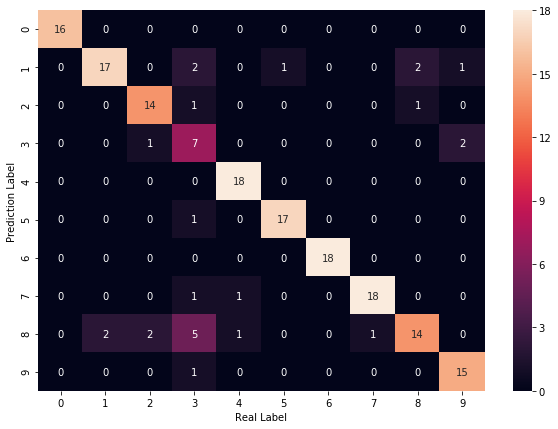

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9461966604823747

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9884707795602224

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1036 Total connections::1404
